In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
import seaborn as sns
from imblearn.over_sampling import SMOTE

import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')
df

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 12 columns]

In [3]:
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

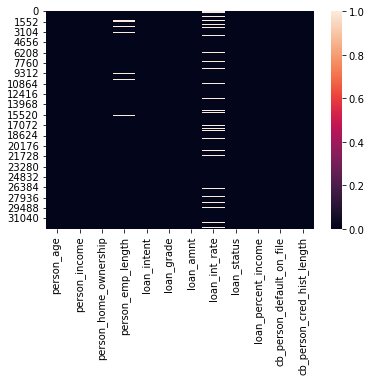

In [4]:
sns.heatmap(df.isnull());

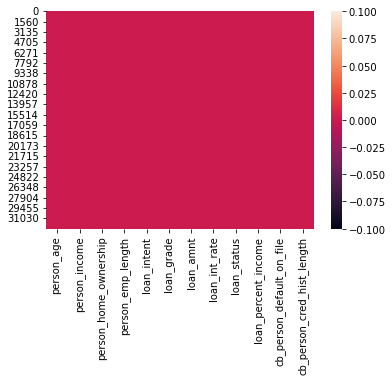

In [5]:
df = df.dropna()
sns.heatmap(df.isnull());

<AxesSubplot:>

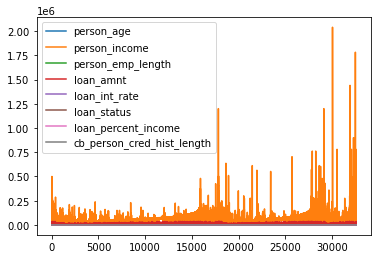

In [6]:
df = df[df['person_age']<80 ]
df = df[df['person_emp_length']<100 ]
df.plot()

In [7]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [8]:
catcols=['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']
target=['loan_status']
numcols=['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']

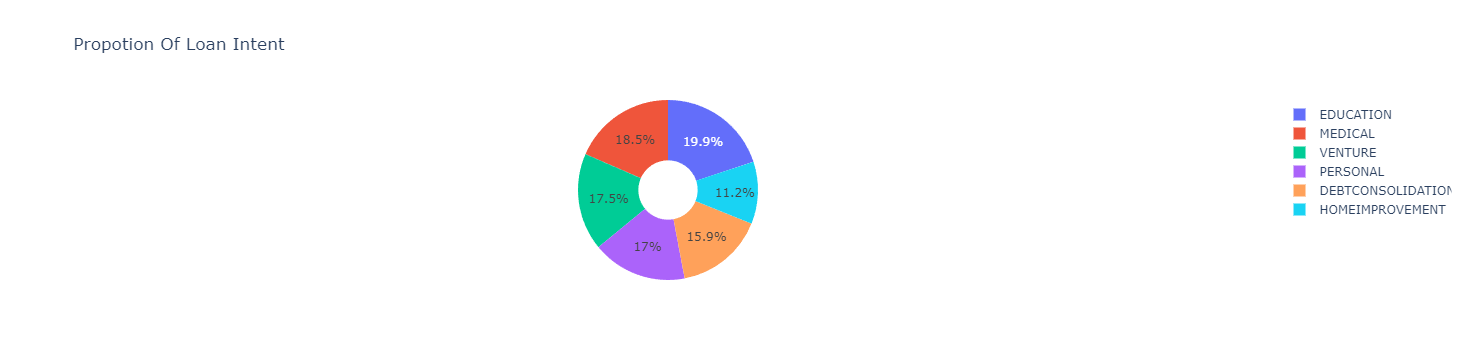

In [9]:
ex.pie(df,names='loan_intent',title='Propotion Of Loan Intent',hole=0.33)

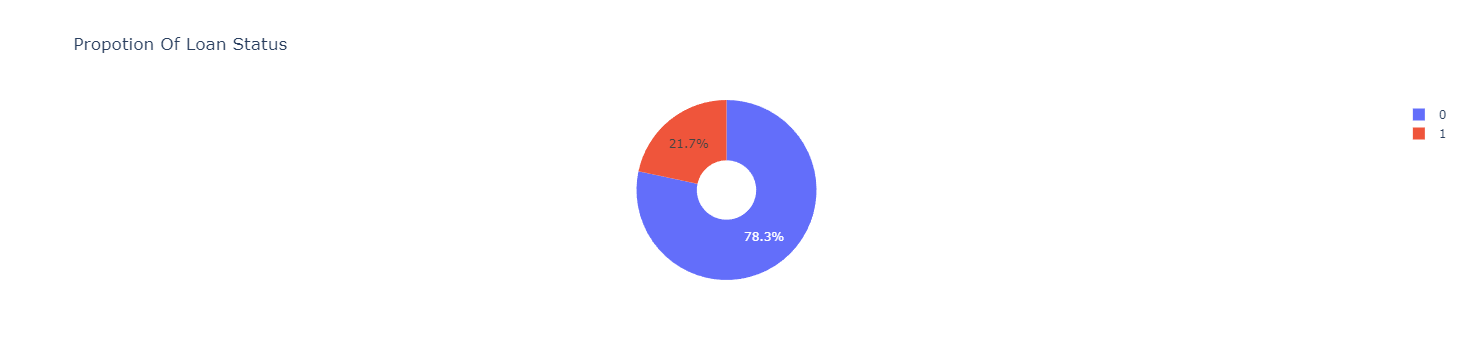

In [10]:
ex.pie(df,names='loan_status',title='Propotion Of Loan Status',hole=0.33)

<AxesSubplot:xlabel='cb_person_default_on_file', ylabel='count'>

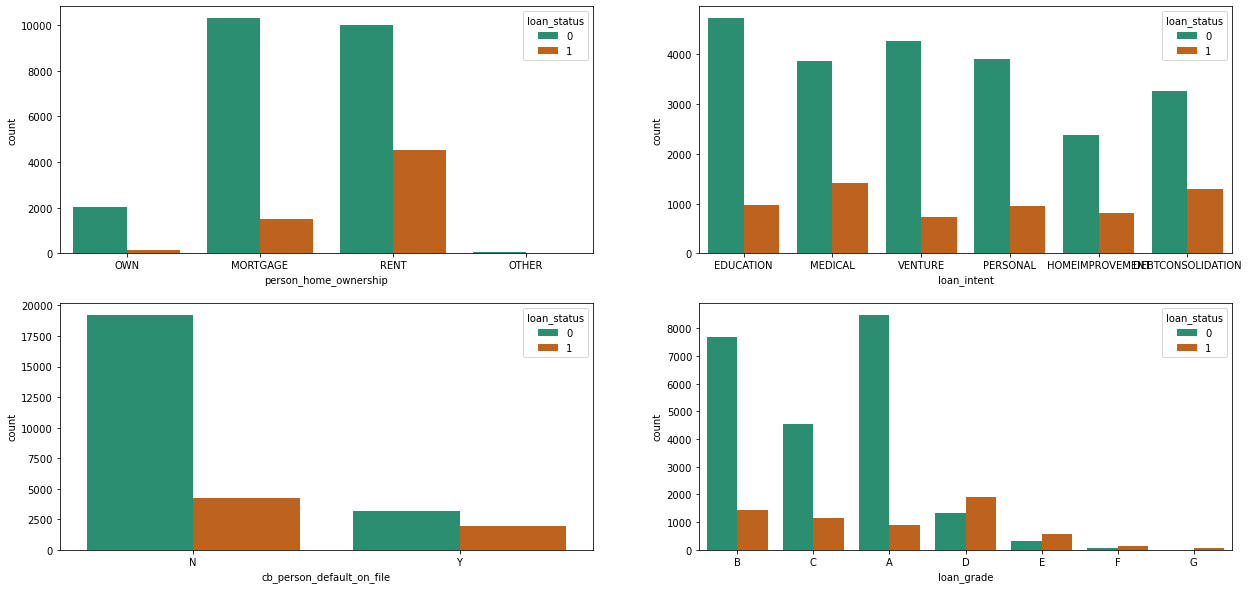

In [11]:
import warnings
warnings.filterwarnings('ignore')
fig,axes = plt.subplots(2,2, figsize=(21,10))
sns.countplot('person_home_ownership',hue="loan_status",data=df,ax=axes[0,0],palette='Dark2')
sns.countplot('loan_intent',data=df,hue="loan_status",ax=axes[0,1],palette='Dark2')
sns.countplot('loan_grade',data=df,hue="loan_status",ax=axes[1,1],palette='Dark2')
sns.countplot('cb_person_default_on_file',hue="loan_status",data=df,ax=axes[1,0],palette='Dark2')

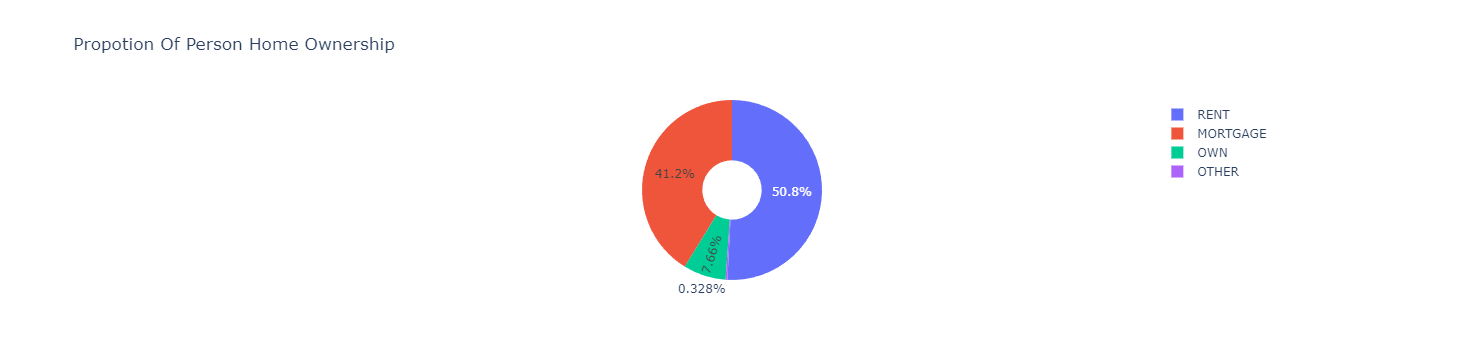

In [12]:
ex.pie(df,names='person_home_ownership',title='Propotion Of Person Home Ownership',hole=0.33)

In [13]:
df = pd.get_dummies(df)

<AxesSubplot:>

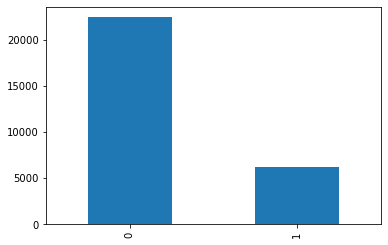

In [14]:
df.loan_status.value_counts().plot(kind='bar')

In [15]:
from imblearn.over_sampling import SMOTE
X_no_sm,y_no_sm = df.loc[:,~df.columns.isin(['target'])], df[target]
sm = SMOTE(sampling_strategy=0.1)
X_sm, y_sm = SMOTE().fit_resample(df.loc[:,~df.columns.isin(['target'])], df[target])

<AxesSubplot:>

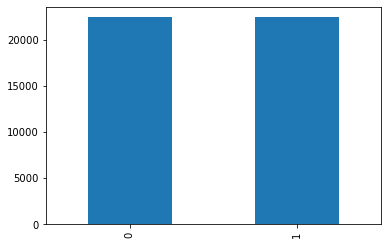

In [16]:
X_sm.loan_status.value_counts().plot(kind='bar')

array([[<AxesSubplot:title={'center':'person_age'}>,
        <AxesSubplot:title={'center':'person_income'}>,
        <AxesSubplot:title={'center':'person_emp_length'}>],
       [<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'loan_int_rate'}>,
        <AxesSubplot:title={'center':'loan_percent_income'}>],
       [<AxesSubplot:title={'center':'cb_person_cred_hist_length'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

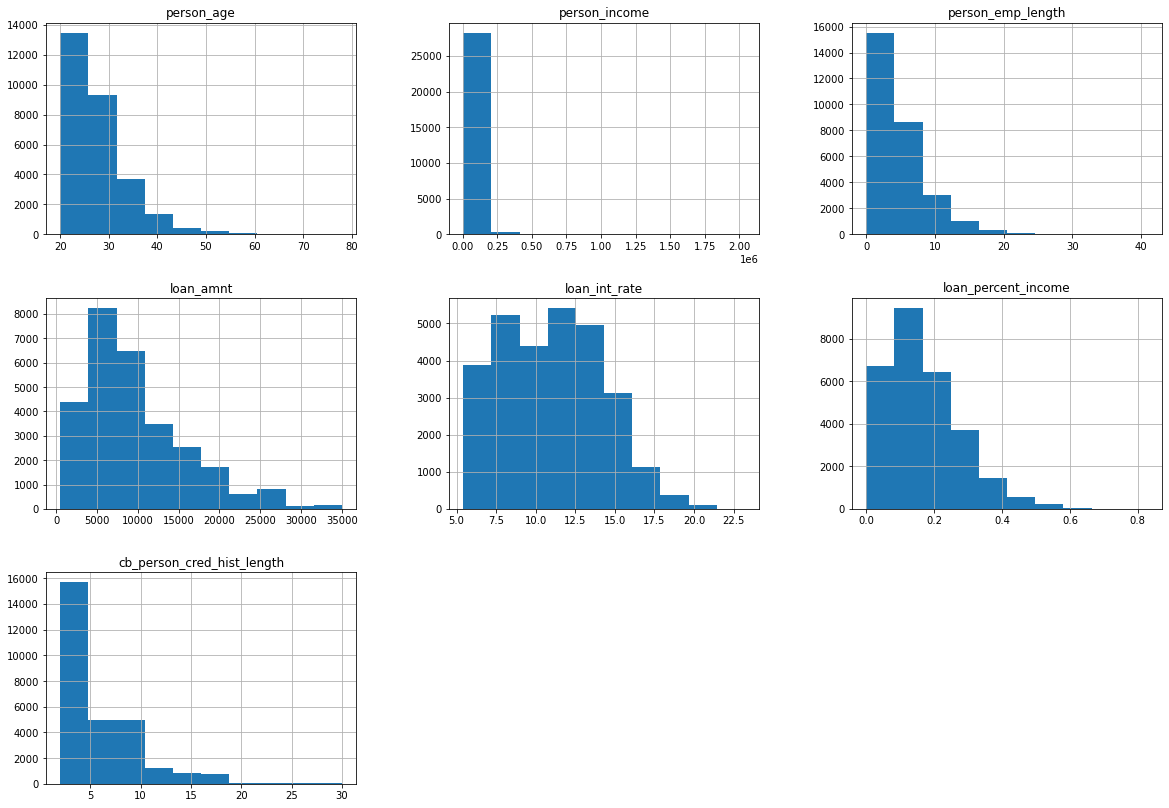

In [17]:
df.loc[:,df.columns.isin(numcols)].hist(figsize=(20,14))

In [18]:
skewed_features=numcols
log_numerical_features=[]
for f in skewed_features:
    X_sm[f + '_log']=np.log1p(X_sm[f])
    log_numerical_features.append(f + '_log')

array([[<AxesSubplot:title={'center':'person_age'}>,
        <AxesSubplot:title={'center':'person_income'}>,
        <AxesSubplot:title={'center':'person_emp_length'}>,
        <AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'loan_int_rate'}>,
        <AxesSubplot:title={'center':'loan_status'}>],
       [<AxesSubplot:title={'center':'loan_percent_income'}>,
        <AxesSubplot:title={'center':'cb_person_cred_hist_length'}>,
        <AxesSubplot:title={'center':'person_home_ownership_MORTGAGE'}>,
        <AxesSubplot:title={'center':'person_home_ownership_OTHER'}>,
        <AxesSubplot:title={'center':'person_home_ownership_OWN'}>,
        <AxesSubplot:title={'center':'person_home_ownership_RENT'}>],
       [<AxesSubplot:title={'center':'loan_intent_DEBTCONSOLIDATION'}>,
        <AxesSubplot:title={'center':'loan_intent_EDUCATION'}>,
        <AxesSubplot:title={'center':'loan_intent_HOMEIMPROVEMENT'}>,
        <AxesSubplot:title={'center':'loan_intent_

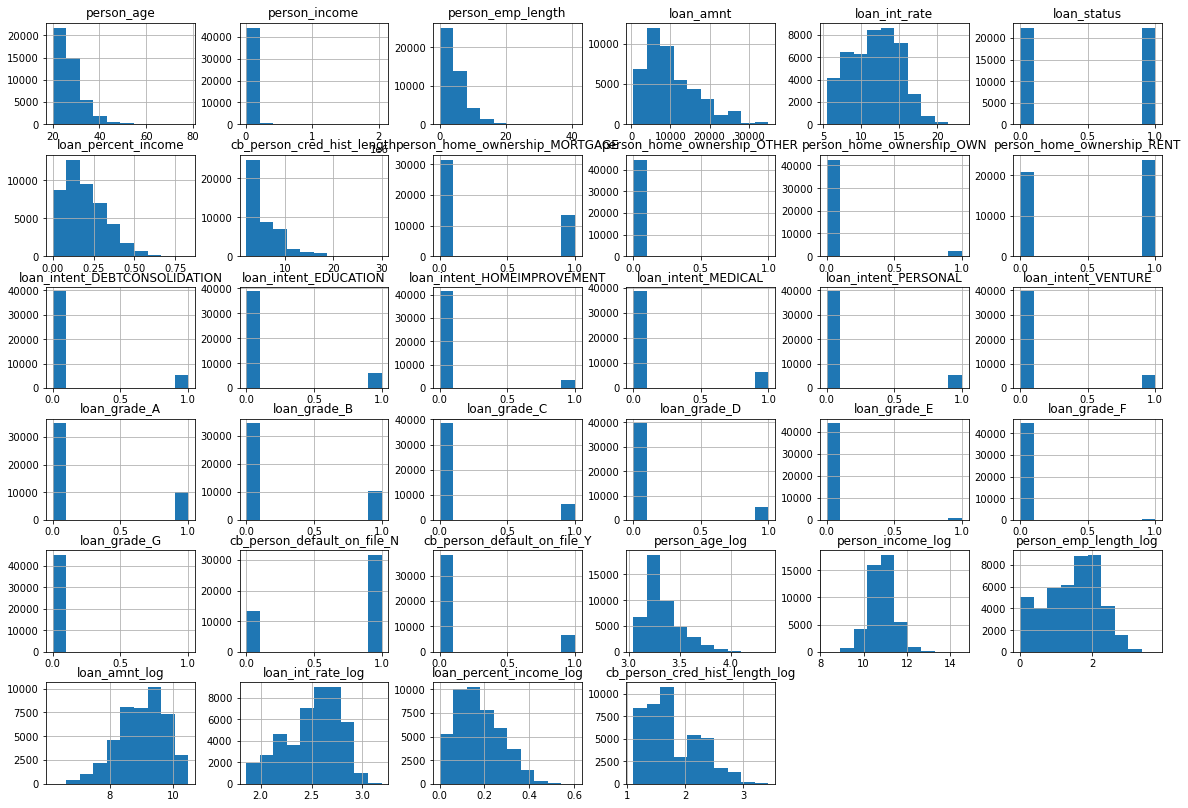

In [19]:
X_sm.hist(figsize=(20,14))

In [20]:
X_sm.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y',
       'person_age_log', 'person_income_log', 'person_emp_length_log',
       'loan_amnt_log', 'loan_int_rate_log', 'loan_percent_income_log',
       'cb_person_cred_hist_length_log'],
      dtype='object')

In [21]:
temp=list()
for i in numcols:
    temp.append(i+'_log')   
numcols+=temp

In [22]:
numcols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'person_age_log',
 'person_income_log',
 'person_emp_length_log',
 'loan_amnt_log',
 'loan_int_rate_log',
 'loan_percent_income_log',
 'cb_person_cred_hist_length_log']

<AxesSubplot:>

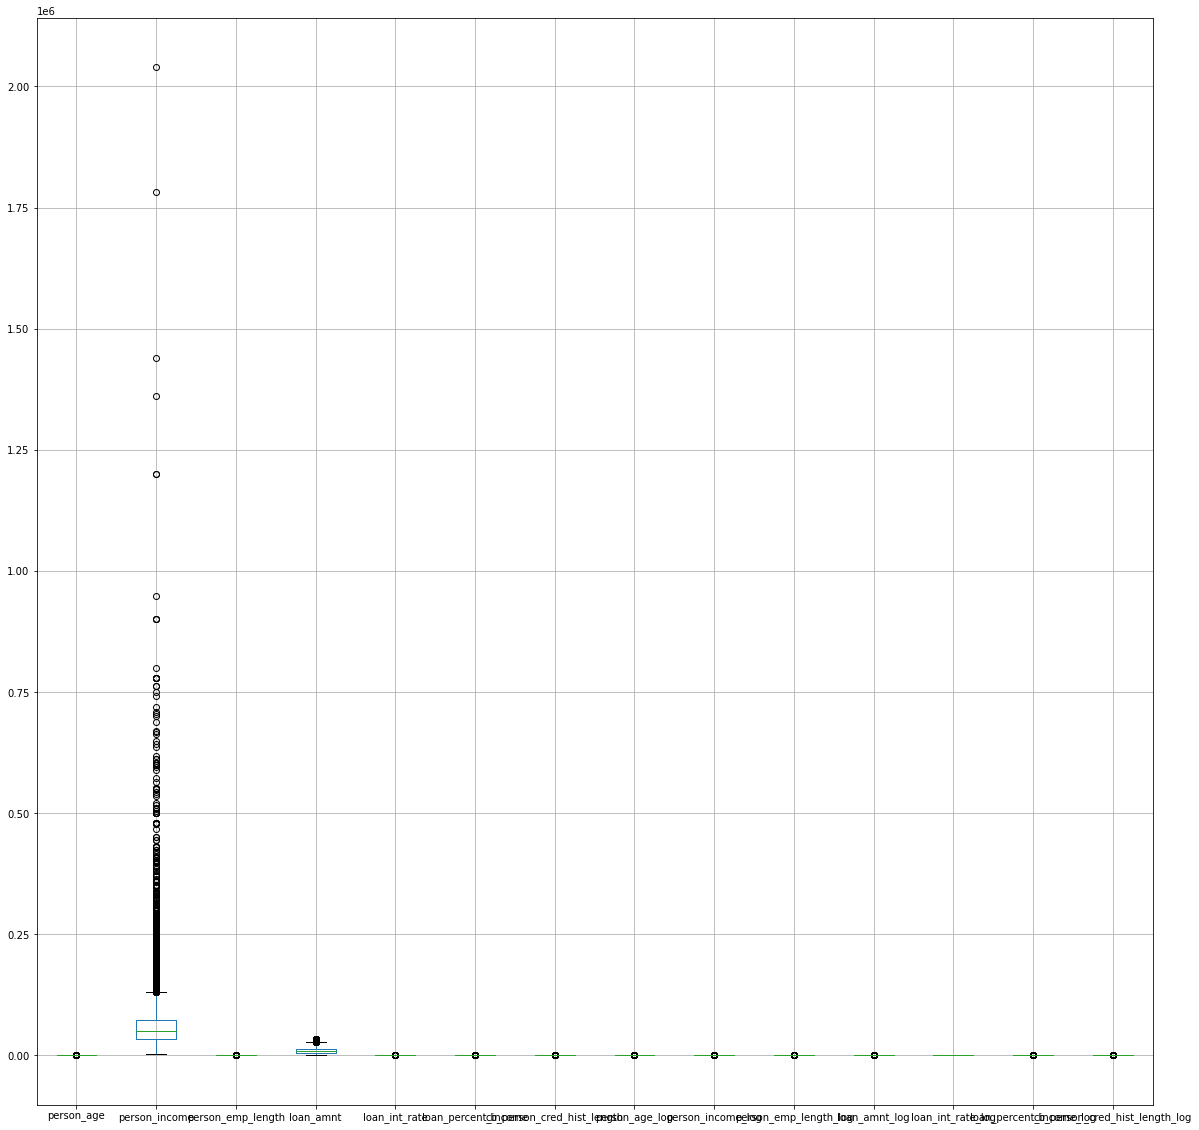

In [23]:
X_sm.loc[:,X_sm.columns.isin(numcols)].boxplot(figsize=(20,20))

In [24]:
from sklearn.preprocessing import StandardScaler
for e in X_sm.columns:
  if e  in numcols:
    X_sm[e] = StandardScaler().fit_transform(np.array(X_sm[e]).reshape(-1,1))
X_sm

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0       -1.102742      -1.074875           0.127836  -1.376901      -0.200640   
1       -0.410441      -1.074875          -0.934689  -0.697940       0.335090   
2       -0.756592       0.105407          -0.137795   3.753025       1.065912   
3       -0.583516      -0.128960           0.924730   3.753025       0.768629   
4       -1.102742      -1.068541          -0.669058  -1.150581      -1.439321   
...           ...            ...                ...        ...            ...   
44851   -0.583516      -0.621659          -0.847648  -0.622500      -0.540619   
44852   -0.756592       0.033788           0.201195  -1.221344       1.059090   
44853   -0.410441       0.189969           0.543535  -0.169860      -0.645385   
44854   -0.583516      -0.285585           0.966550   0.735421       1.846427   
44855   -0.756592      -0.623032          -0.996024  -0.018980      -0.474488   

       loan_status  loan_percent_income  cb_person_cred_hist_length  \
0                0            -0.795773                   -0.935814   
1                1             3.058579                   -0.671303   
2                1             2.730549                   -0.935814   
3                1             2.894564                   -0.406792   
4                1             0.434339                   -0.935814   
...            ...                  ...                         ...   
44851            1            -0.057706                   -0.406792   
44852            1            -1.348895                   -0.671303   
44853            1            -0.549751                   -0.142280   
44854            1             1.008392                   -0.671303   
44855            1             1.008392                   -0.935814   

       person_home_ownership_MORTGAGE  person_home_ownership_OTHER  ...  \
0                                   0                            0  ...   
1                                   1                            0  ...   
2                                   0                            0  ...   
3                                   0                            0  ...   
4                                   0                            0  ...   
...                               ...                          ...  ...   
44851                               0                            0  ...   
44852                               1                            0  ...   
44853                               0                            0  ...   
44854                               0                            0  ...   
44855                               0                            0  ...   

       loan_grade_G  cb_person_default_on_file_N  cb_person_default_on_file_Y  \
0                 0                            1                            0   
1                 0                            1                            0   
2                 0                            1                            0   
3                 0                            0                            1   
4                 0                            1                            0   
...             ...                          ...                          ...   
44851             0                            1                            0   
44852             0                            1                            0   
44853             0                            0                            0   
44854             0                            0                            0   
44855             0                            0                            0   

       person_age_log  person_income_log  person_emp_length_log  \
0           -1.312024          -2.855188               0.443414   
1           -0.386470          -2.855188              -1.031154   
2           -0.829942           0.442125               0.198700   
3           -0.603770           0.12327

<AxesSubplot:>

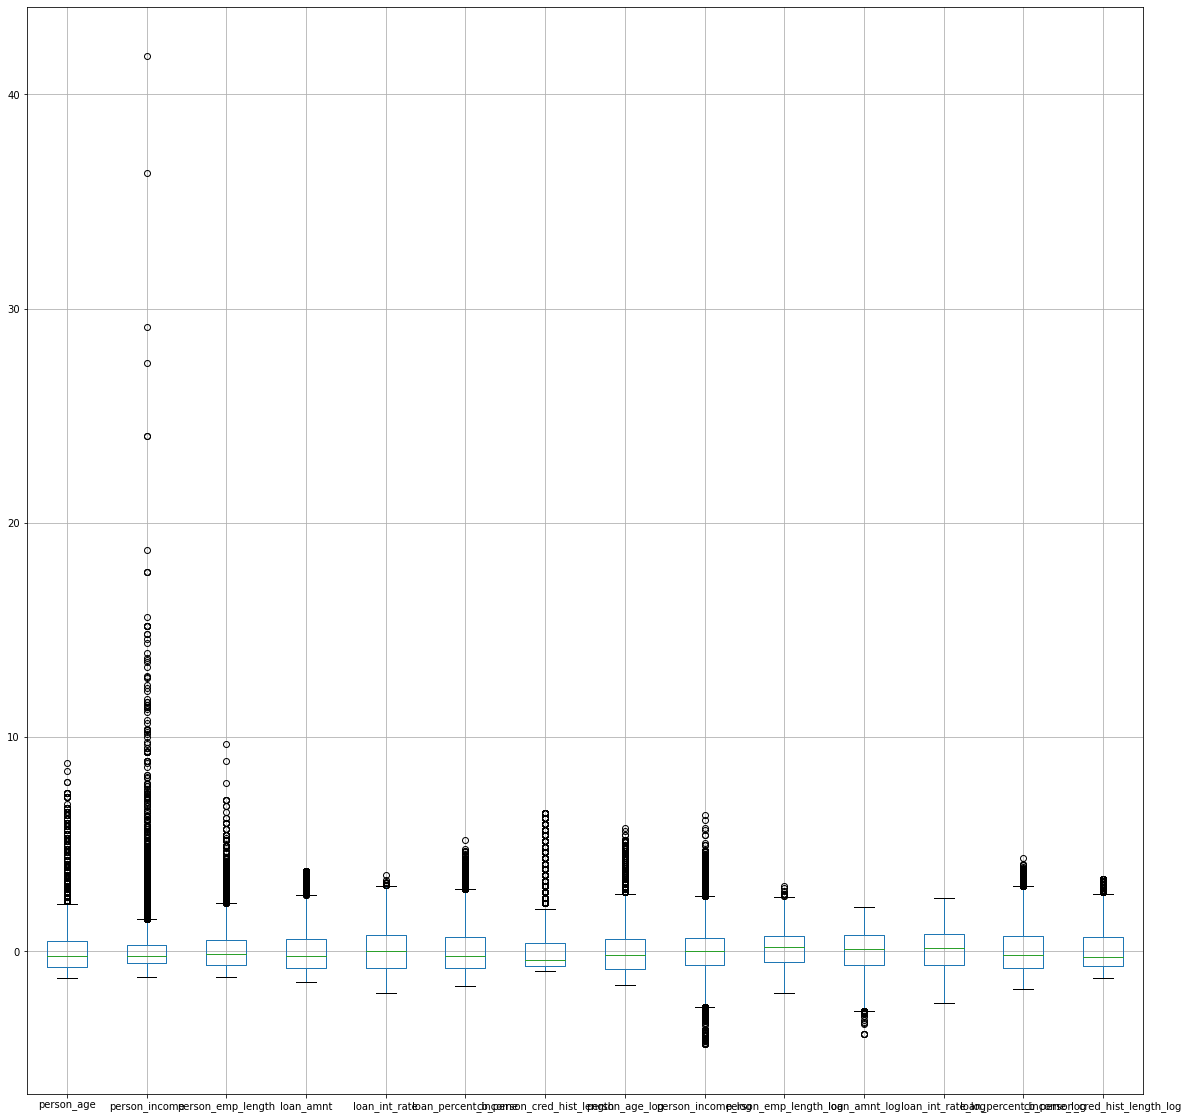

In [25]:
X_sm.loc[:,X_sm.columns.isin(numcols)].boxplot(figsize=(20,20))

In [26]:
import numpy as np
for e in X_sm.columns:
  if e in numcols:
    Q3 = np.quantile(X_sm[e], 0.75)
    Q1 = np.quantile(X_sm[e], 0.25)
    IQR = Q3 - Q1
    print(IQR)
    X_sm = X_sm[(X_sm[e]<(Q3 + 1.5*IQR)) & (X_sm[e]>(Q1 - 1.5*IQR))]

1.2115280647943811
0.8234525565905744
1.0625248754585948
1.2372173896542196
1.489514640509598
1.49364281396873
1.0580449835890342
1.0484846186122163
1.2130813945508185
1.1887918142770042
1.32434987442276
1.4111671243225712
1.4680227273542847
1.1098731305579177


<AxesSubplot:>

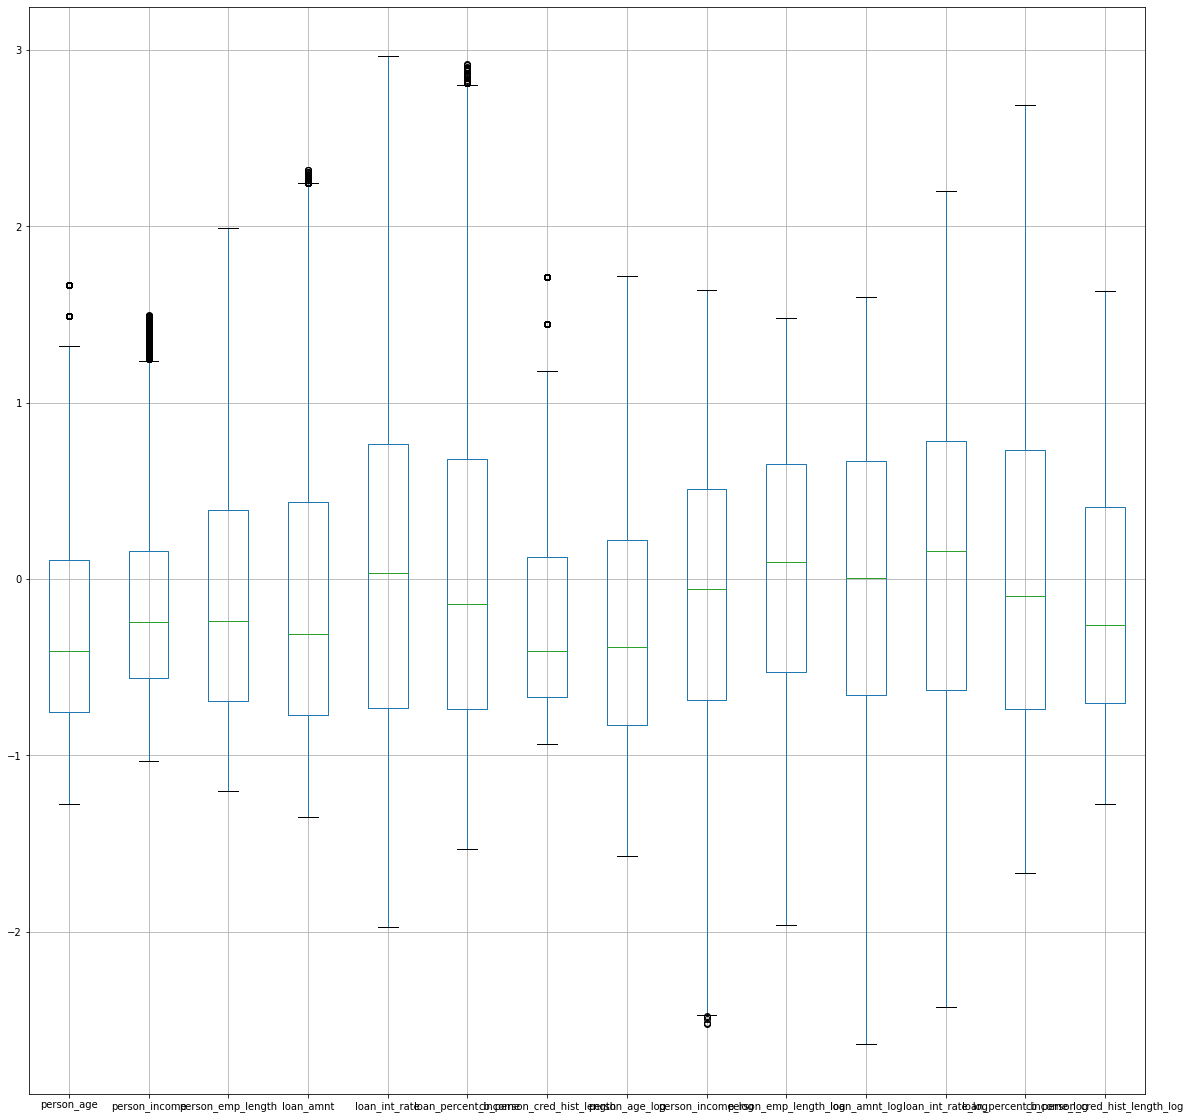

In [27]:
X_sm.loc[:,X_sm.columns.isin(numcols)].boxplot(figsize=(20,20))

In [28]:
X_sm.corr()['loan_status'].sort_values(ascending = False)

loan_status                       1.000000
loan_int_rate                     0.407690
loan_int_rate_log                 0.404062
loan_percent_income               0.397390
loan_percent_income_log           0.394335
loan_grade_D                      0.184403
person_home_ownership_RENT        0.163987
loan_amnt                         0.148164
loan_amnt_log                     0.119680
loan_grade_E                      0.066366
loan_grade_G                      0.035102
loan_grade_F                      0.032707
cb_person_default_on_file_Y       0.025550
person_home_ownership_OTHER      -0.019273
person_age_log                   -0.020612
person_age                       -0.021308
cb_person_cred_hist_length_log   -0.026241
cb_person_cred_hist_length       -0.029587
person_emp_length_log            -0.064977
loan_intent_HOMEIMPROVEMENT      -0.090220
loan_intent_DEBTCONSOLIDATION    -0.095490
loan_intent_MEDICAL              -0.097564
person_emp_length                -0.098459
loan_intent

In [29]:
list(filter(lambda x: 'log'  in x, numcols))
#[ i for i in numcols if i not in list(filter(lambda x: 'log' in x, numcols)) ]

['person_age_log',
 'person_income_log',
 'person_emp_length_log',
 'loan_amnt_log',
 'loan_int_rate_log',
 'loan_percent_income_log',
 'cb_person_cred_hist_length_log']

In [30]:
X_sm = X_sm.loc[:,~X_sm.columns.isin(list(filter(lambda x: 'log'  in x, numcols)))]

In [31]:
X_sm.corr()['loan_status'].sort_values(ascending = False)

loan_status                       1.000000
loan_int_rate                     0.407690
loan_percent_income               0.397390
loan_grade_D                      0.184403
person_home_ownership_RENT        0.163987
loan_amnt                         0.148164
loan_grade_E                      0.066366
loan_grade_G                      0.035102
loan_grade_F                      0.032707
cb_person_default_on_file_Y       0.025550
person_home_ownership_OTHER      -0.019273
person_age                       -0.021308
cb_person_cred_hist_length       -0.029587
loan_intent_HOMEIMPROVEMENT      -0.090220
loan_intent_DEBTCONSOLIDATION    -0.095490
loan_intent_MEDICAL              -0.097564
person_emp_length                -0.098459
loan_intent_PERSONAL             -0.172112
loan_grade_C                     -0.172926
person_home_ownership_OWN        -0.186647
loan_intent_VENTURE              -0.225434
loan_intent_EDUCATION            -0.230427
loan_grade_B                     -0.272369
person_inco

In [32]:
X_sm['neg_loan_grade_A'] = -1*X_sm['loan_grade_A']
X_sm['neg_loan_grade_C'] = -1*X_sm['loan_grade_C']
X_sm['neg_person_home_ownership_OWN'] = -1*X_sm['person_home_ownership_OWN']
X_sm['neg_loan_intent_VENTURE'] = -1*X_sm['loan_intent_VENTURE']
X_sm['neg_loan_intent_EDUCATION'] = -1*X_sm['loan_intent_EDUCATION']
X_sm['neg_loan_grade_B'] = -1*X_sm['loan_grade_B']
X_sm['neg_person_income'] = -1*X_sm['person_income']
X_sm['neg_cb_person_default_on_file_N'] = -1*X_sm['cb_person_default_on_file_N']
X_sm['neg_person_home_ownership_MORTGAGE'] = -1*X_sm['person_home_ownership_MORTGAGE']

In [33]:
fs1 = X_sm.corr()['loan_status'].sort_values(ascending = False)[:20]
fs1

loan_status                           1.000000
loan_int_rate                         0.407690
loan_percent_income                   0.397390
neg_loan_grade_A                      0.379152
neg_person_home_ownership_MORTGAGE    0.350950
neg_cb_person_default_on_file_N       0.338551
neg_person_income                     0.308317
neg_loan_grade_B                      0.272369
neg_loan_intent_EDUCATION             0.230427
neg_loan_intent_VENTURE               0.225434
neg_person_home_ownership_OWN         0.186647
loan_grade_D                          0.184403
neg_loan_grade_C                      0.172926
person_home_ownership_RENT            0.163987
loan_amnt                             0.148164
loan_grade_E                          0.066366
loan_grade_G                          0.035102
loan_grade_F                          0.032707
cb_person_default_on_file_Y           0.025550
person_home_ownership_OTHER          -0.019273
Name: loan_status, dtype: float64

In [34]:
X_sm_fs1 = X_sm.loc[:,X_sm.columns.isin(fs1.index)]
X_sm_fs1

loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
34     -1.150581      -1.324743            1             0.106309   
39     -1.150581       0.279350            1             0.106309   
59     -1.301461       0.945141            0            -0.549751   
64     -1.075141       0.564246            1             0.434339   
67     -0.607412      -1.324743            1             2.566534   
...          ...            ...          ...                  ...   
44851  -0.622500      -0.540619            1            -0.057706   
44852  -1.221344       1.059090            1            -1.348895   
44853  -0.169860      -0.645385            1            -0.549751   
44854   0.735421       1.846427            1             1.008392   
44855  -0.018980      -0.474488            1             1.008392   

       person_home_ownership_OTHER  person_home_ownership_RENT  loan_grade_D  \
34                               0                           0             0   
39                               0                           0             0   
59                               0                           0             1   
64                               0                           0             0   
67                               0                           0             0   
...                            ...                         ...           ...   
44851                            0                           1             0   
44852                            0                           0             0   
44853                            0                           0             0   
44854                            0                           1             0   
44855                            0                           1             0   

       loan_grade_E  loan_grade_F  loan_grade_G  cb_person_default_on_file_Y  \
34                0             0             0                            0   
39                0             0             0                            0   
59                0             0             0                            1   
64                0             0             0                            1   
67                0             0             0                            0   
...             ...           ...           ...                          ...   
44851             0             0             0                            0   
44852             0             0             0                            0   
44853             0             0             0                            0   
44854             0             0             0                            0   
44855             0             0             0                            0   

       neg_loan_grade_A  neg_loan_grade_C  neg_person_home_ownership_OWN  \
34                   -1                 0                             -1   
39                    0                 0                             -1   
59                    0                 0                              0   
64                    0                -1                             -1   
67                   -1                 0                             -1   
...                 ...               ...                            ...   
44851                 0                 0                              0   
44852                 0                 0                              0   
44853                 0                 0                              0   
44854                 0                 0                              0   
44855                 0                 0                              0   

       neg_loan_intent_VENTURE  neg_loan_intent_EDUCATION  neg_loan_grade_B  \
34                           0                         -1                 0   
39                          -1                          0                -1   
59                           0                         -1                 0   
64                         

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_pf = pd.DataFrame(data=poly.fit_transform(X_sm_fs1), columns=poly.get_feature_names(X_sm_fs1.columns))

In [43]:
list(filter(lambda x: 'loan_status' not in x, list(X_pf.corr()['loan_status'].sort_values(ascending = False).head(50).index)))
#list(X_pf.corr()['loan_status'].sort_values(ascending = False).head(50).index)[idx]
top_corr_poly = dict()
for i in list(filter(lambda x: 'loan_status' not in x, list(X_pf.corr()['loan_status'].sort_values(ascending = False).head(50).index))):
    top_corr_poly[i] = X_pf.corr()['loan_status'][i]
top_corr_poly

{'loan_int_rate': 0.4076895007046013,
 'loan_percent_income': 0.3973899949266947,
 'loan_percent_income person_home_ownership_RENT': 0.3803756309210092,
 'neg_loan_grade_A': 0.37915152096106464,
 'neg_person_home_ownership_MORTGAGE': 0.35095016095619397,
 'neg_cb_person_default_on_file_N': 0.33855053627443016,
 'neg_person_income': 0.30831721952957364,
 'person_home_ownership_RENT neg_person_income': 0.29566488772950367,
 'neg_loan_grade_B': 0.2723685567726424,
 'loan_int_rate person_home_ownership_RENT': 0.2620556059048851,
 'loan_percent_income^2': 0.2507336801134933,
 'neg_loan_intent_EDUCATION': 0.23042720310217266,
 'neg_loan_intent_VENTURE': 0.22543377893123923,
 'neg_person_home_ownership_OWN': 0.1866473439622114,
 'loan_grade_D': 0.18440336618512537,
 'loan_grade_D^2': 0.18440336618512537,
 'person_home_ownership_RENT loan_grade_D': 0.18353695544571008,
 'person_home_ownership_RENT neg_loan_grade_A': 0.17875263413370798,
 'loan_int_rate loan_grade_D': 0.17498039844480406,
 'neg

In [44]:
{k:v for (k,v) in top_corr_poly.items() if v>0.15}

{'loan_int_rate': 0.4076895007046013,
 'loan_percent_income': 0.3973899949266947,
 'loan_percent_income person_home_ownership_RENT': 0.3803756309210092,
 'neg_loan_grade_A': 0.37915152096106464,
 'neg_person_home_ownership_MORTGAGE': 0.35095016095619397,
 'neg_cb_person_default_on_file_N': 0.33855053627443016,
 'neg_person_income': 0.30831721952957364,
 'person_home_ownership_RENT neg_person_income': 0.29566488772950367,
 'neg_loan_grade_B': 0.2723685567726424,
 'loan_int_rate person_home_ownership_RENT': 0.2620556059048851,
 'loan_percent_income^2': 0.2507336801134933,
 'neg_loan_intent_EDUCATION': 0.23042720310217266,
 'neg_loan_intent_VENTURE': 0.22543377893123923,
 'neg_person_home_ownership_OWN': 0.1866473439622114,
 'loan_grade_D': 0.18440336618512537,
 'loan_grade_D^2': 0.18440336618512537,
 'person_home_ownership_RENT loan_grade_D': 0.18353695544571008,
 'person_home_ownership_RENT neg_loan_grade_A': 0.17875263413370798,
 'loan_int_rate loan_grade_D': 0.17498039844480406,
 'neg

In [45]:
{k for (k,v) in top_corr_poly.items() if v>0.15}

{'loan_amnt person_home_ownership_RENT',
 'loan_grade_D',
 'loan_grade_D^2',
 'loan_int_rate',
 'loan_int_rate loan_grade_D',
 'loan_int_rate person_home_ownership_RENT',
 'loan_percent_income',
 'loan_percent_income neg_person_income',
 'loan_percent_income person_home_ownership_RENT',
 'loan_percent_income^2',
 'neg_cb_person_default_on_file_N',
 'neg_loan_grade_A',
 'neg_loan_grade_B',
 'neg_loan_grade_C',
 'neg_loan_intent_EDUCATION',
 'neg_loan_intent_VENTURE',
 'neg_person_home_ownership_MORTGAGE',
 'neg_person_home_ownership_OWN',
 'neg_person_income',
 'person_home_ownership_RENT',
 'person_home_ownership_RENT loan_grade_D',
 'person_home_ownership_RENT neg_loan_grade_A',
 'person_home_ownership_RENT neg_person_income',
 'person_home_ownership_RENT^2'}

In [46]:
clean_df = X_pf.loc[:,X_pf.columns.isin({k:v for (k,v) in top_corr_poly.items() if v>0.15})]
clean_df['loan_status'] = X_pf['loan_status']
clean_df

loan_int_rate  loan_percent_income  person_home_ownership_RENT  \
0          -1.324743             0.106309                         0.0   
1           0.279350             0.106309                         0.0   
2           0.945141            -0.549751                         0.0   
3           0.564246             0.434339                         0.0   
4          -1.324743             2.566534                         0.0   
...              ...                  ...                         ...   
37083      -0.540619            -0.057706                         1.0   
37084       1.059090            -1.348895                         0.0   
37085      -0.645385            -0.549751                         0.0   
37086       1.846427             1.008392                         1.0   
37087      -0.474488             1.008392                         1.0   

       loan_grade_D  neg_loan_grade_A  neg_loan_grade_C  \
0               0.0              -1.0               0.0   
1               0.0               0.0               0.0   
2               1.0               0.0               0.0   
3               0.0               0.0              -1.0   
4               0.0              -1.0               0.0   
...             ...               ...               ...   
37083           0.0               0.0               0.0   
37084           0.0               0.0               0.0   
37085           0.0               0.0               0.0   
37086           0.0               0.0               0.0   
37087           0.0               0.0               0.0   

       neg_person_home_ownership_OWN  neg_loan_intent_VENTURE  \
0                               -1.0                      0.0   
1                               -1.0                     -1.0   
2                                0.0                      0.0   
3                               -1.0                      0.0   
4                               -1.0                      0.0   
...                              ...                      ...   
37083                            0.0                      0.0   
37084                            0.0                      0.0   
37085                            0.0                      0.0   
37086                            0.0                      0.0   
37087                            0.0                      0.0   

       neg_loan_intent_EDUCATION  neg_loan_grade_B  ...  \
0                           -1.0               0.0  ...   
1                            0.0              -1.0  ...   
2                           -1.0               0.0  ...   
3                           -1.0               0.0  ...   
4                           -1.0               0.0  ...   
...                          ...               ...  ...   
37083                        0.0               0.0  ...   
37084                        0.0               0.0  ...   
37085                        0.0               0.0  ...   
37086                        0.0               0.0  ...   
37087                        0.0               0.0  ...   

       loan_int_rate loan_grade_D  loan_percent_income^2  \
0                       -0.000000               0.011302   
1                        0.000000               0.011302   
2                        0.945141               0.302226   
3                        0.000000               0.188651   
4                       -0.000000               6.587097   
...                           ...                    ...   
37083                   -0.000000               0.003330   
37084                    0.000000               1.819517   
37085                   -0.000000               0.302226   
37086                    0.000000               1.016854   
37087                   -0.000000               1.016854   

       loan_percent_income person_home_ownership_RENT  \
0                                            0.000000   
1                                            0.000000   
2                                      

<AxesSubplot:>

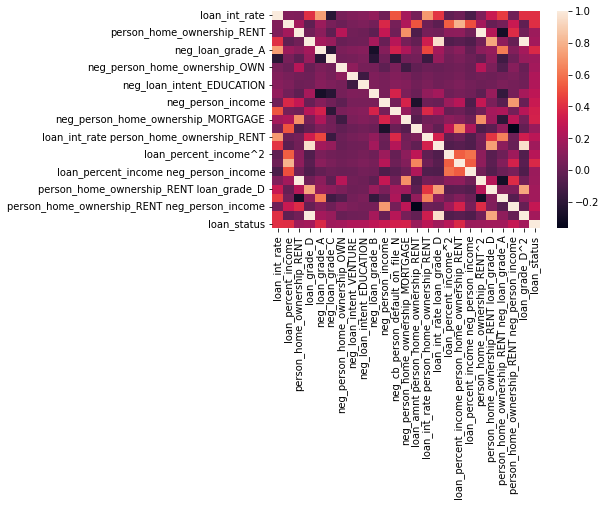

In [47]:
sns.heatmap(clean_df.corr())

In [49]:
from sklearn.model_selection import train_test_split
X,y = clean_df.loc[:,~clean_df.columns.isin(['loan_status'])] , clean_df.loc[:,clean_df.columns.isin(['loan_status'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [ ]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators=1000, max_depth=15, learning_rate=0.05, objective='binary:logistic', random_state=10)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1, ...)

In [53]:
!pip install xgboost

In [79]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score 
from sklearn.metrics import roc_auc_score
import time
from copy import deepcopy

In [74]:
#from xgboost import XGBClassifier as xgb

#dictionary for collecting results
results_dict = {}

#obtaining default parameters by calling .fit() to XGBoost model instance
xgbc0 = xgb.XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)
xgbc0.fit(X_train , y_train)

#extracting default parameters from benchmark model
default_params = {}
gparams = xgbc0.get_params()

#default parameters have to be wrapped in lists - even single values - so GridSearchCV can take them as inputs
for key in gparams.keys():
    gp = gparams[key]
    default_params[key] = [gp]

#benchmark model. Grid search is not performed, since only single values are provided as parameter grid.
#However, cross-validation is still executed
clf0 = GridSearchCV(estimator=xgbc0, scoring='accuracy', param_grid=default_params, return_train_score=True, verbose=1, cv=3)
clf0.fit(X_train, y_train.values.ravel())

#results dataframe
df = pd.DataFrame(clf0.cv_results_)

#predictions - inputs to confusion matrix
train_predictions = clf0.predict(X_train)
test_predictions = clf0.predict(X_test)
#unseen_predictions = clf0.predict(X_test)

#confusion matrices
cfm_train = confusion_matrix(y_train, train_predictions)
cfm_test = confusion_matrix(y_test, test_predictions)
#cfm_unseen = confusion_matrix(df_test.iloc[:,:1], unseen_predictions)

#accuracy scores
accs_train = accuracy_score(y_train, train_predictions)
accs_test = accuracy_score(y_test, test_predictions)
#accs_unseen = accuracy_score(df_test.iloc[:,:1], unseen_predictions)

#F1 scores for each train/test label
f1s_train_p1 = f1_score(y_train, train_predictions, pos_label=1)
f1s_train_p0 = f1_score(y_train, train_predictions, pos_label=0)
f1s_test_p1 = f1_score(y_test, test_predictions, pos_label=1)
f1s_test_p0 = f1_score(y_test, test_predictions, pos_label=0)
#f1s_unseen_p1 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=1)
#f1s_unseen_p0 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=0)

#Area Under the Receiver Operating Characteristic Curve
test_ras = roc_auc_score(y_test, clf0.predict_proba(X_test)[:,1])
#unseen_ras = roc_auc_score(df_test.iloc[:,:1], clf0.predict_proba(df_test.iloc[:,1:])[:,1])

#best parameters
bp = clf0.best_params_

#storing computed values in results dictionary
results_dict['xgbc0'] = {'iterable_parameter': np.nan,
                         'classifier': deepcopy(clf0),
                         'cv_results': df.copy(),
                         'cfm_train': cfm_train,
                         'cfm_test': cfm_test,
                         #'cfm_unseen': cfm_unseen,
                         'train_accuracy': accs_train,
                         'test_accuracy': accs_test,
                         #'unseen_accuracy': accs_unseen,
                         'train F1-score label 1': f1s_train_p1,
                         'train F1-score label 0': f1s_train_p0,
                         'test F1-score label 1': f1s_test_p1,
                         'test F1-score label 0': f1s_test_p0,
                         #'unseen F1-score label 1': f1s_unseen_p1,
                         #'unseen F1-score label 0': f1s_unseen_p0,
                         'test roc auc score': test_ras,
                         #'unseen roc auc score': unseen_ras,
                         'best_params': bp}

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [75]:
#creating deepcopy of default parameters before manipulations
params = deepcopy(default_params)

#setting grid of selected parameters for iteration
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

In [80]:
#start time
t0 = time.time()
#No. of jobs
gcvj = np.cumsum([len(x) for x in param_grid.values()])[-1]

#iteration loop. Each selected parameter iterated separately
for i,grid_key in enumerate(param_grid.keys()):
    
    #variable for measuring iteration time
    loop_start = time.time()
       
    #creating param_grid argument for GridSearchCV:
    #listing grid values of current iterable parameter and wrapping non-iterable parameter single values in list
    for param_key in params.keys():
        if param_key == grid_key:
            params[param_key] = param_grid[grid_key]
        else:
            #use best parameters of last iteration
            try:
                param_value = [clf.best_params_[param_key]]
                params[param_key] = param_value
            #use benchmark model parameters for first iteration
            except:
                param_value = [clf0.best_params_[param_key]]
                params[param_key] = param_value
    
    #classifier instance of current iteration
    xgbc = xgb.XGBClassifier(**default_params)
    
    #GridSearch instance of current iteration
    clf = GridSearchCV(estimator=xgbc, param_grid=params, scoring='accuracy', return_train_score=True, verbose=1, cv=3)
    clf.fit(X_train, y_train.values.ravel())
    
    #results dataframe
    df = pd.DataFrame(clf.cv_results_)
    
    #predictions - inputs to confusion matrix
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)
    #unseen_predictions = clf.predict(df_test.iloc[:,1:])
    
    #confusion matrices
    cfm_train = confusion_matrix(y_train, train_predictions)
    cfm_test = confusion_matrix(y_test, test_predictions)
    #cfm_unseen = confusion_matrix(df_test.iloc[:,:1], unseen_predictions)
    
    #accuracy scores
    accs_train = accuracy_score(y_train, train_predictions)
    accs_test = accuracy_score(y_test, test_predictions)
    #accs_unseen = accuracy_score(df_test.iloc[:,:1], unseen_predictions)
    
    #F1 scores for each train/test label
    f1s_train_p1 = f1_score(y_train, train_predictions, pos_label=1)
    f1s_train_p0 = f1_score(y_train, train_predictions, pos_label=0)
    f1s_test_p1 = f1_score(y_test, test_predictions, pos_label=1)
    f1s_test_p0 = f1_score(y_test, test_predictions, pos_label=0)
    #f1s_unseen_p1 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=1)
    #f1s_unseen_p0 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=0)
    
    #Area Under the Receiver Operating Characteristic Curve
    test_ras = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
    #unseen_ras = roc_auc_score(df_test.iloc[:,:1], clf.predict_proba(df_test.iloc[:,1:])[:,1])
    
    #best parameters
    bp = clf.best_params_
    
    #storing computed values in results dictionary
    results_dict[f'xgbc{i+1}'] = {'iterable_parameter': grid_key,
                                  'classifier': deepcopy(clf),
                                  'cv_results': df.copy(),
                                  'cfm_train': cfm_train,
                                  'cfm_test': cfm_test,
                                  #'cfm_unseen': cfm_unseen,
                                  'train_accuracy': accs_train,
                                  'test_accuracy': accs_test,
                                  #'unseen_accuracy': accs_unseen,
                                  'train F1-score label 1': f1s_train_p1,
                                  'train F1-score label 0': f1s_train_p0,
                                  'test F1-score label 1': f1s_test_p1,
                                  'test F1-score label 0': f1s_test_p0,
                                  #'unseen F1-score label 1': f1s_unseen_p1,
                                  #'unseen F1-score label 0': f1s_unseen_p0,
                                  'test roc auc score': test_ras,
                                  #'unseen roc auc score': unseen_ras,
                                  'best_params': bp}
    
    #variable for measuring iteration time
    elapsed_time = time.time() - loop_start
    print(f'iteration #{i+1} finished in: {elapsed_time} seconds')

#stop time
t1 = time.time()

#elapsed time
gcvt = t1 - t0

Fitting 3 folds for each of 13 candidates, totalling 39 fits
iteration #1 finished in: 6.6241655349731445 seconds
Fitting 3 folds for each of 12 candidates, totalling 36 fits
iteration #2 finished in: 9.6970374584198 seconds
Fitting 3 folds for each of 10 candidates, totalling 30 fits
iteration #3 finished in: 20.172065258026123 seconds
Fitting 3 folds for each of 7 candidates, totalling 21 fits
iteration #4 finished in: 11.752850532531738 seconds
Fitting 3 folds for each of 13 candidates, totalling 39 fits
iteration #5 finished in: 19.07880926132202 seconds
Fitting 3 folds for each of 13 candidates, totalling 39 fits
iteration #6 finished in: 29.821287155151367 seconds


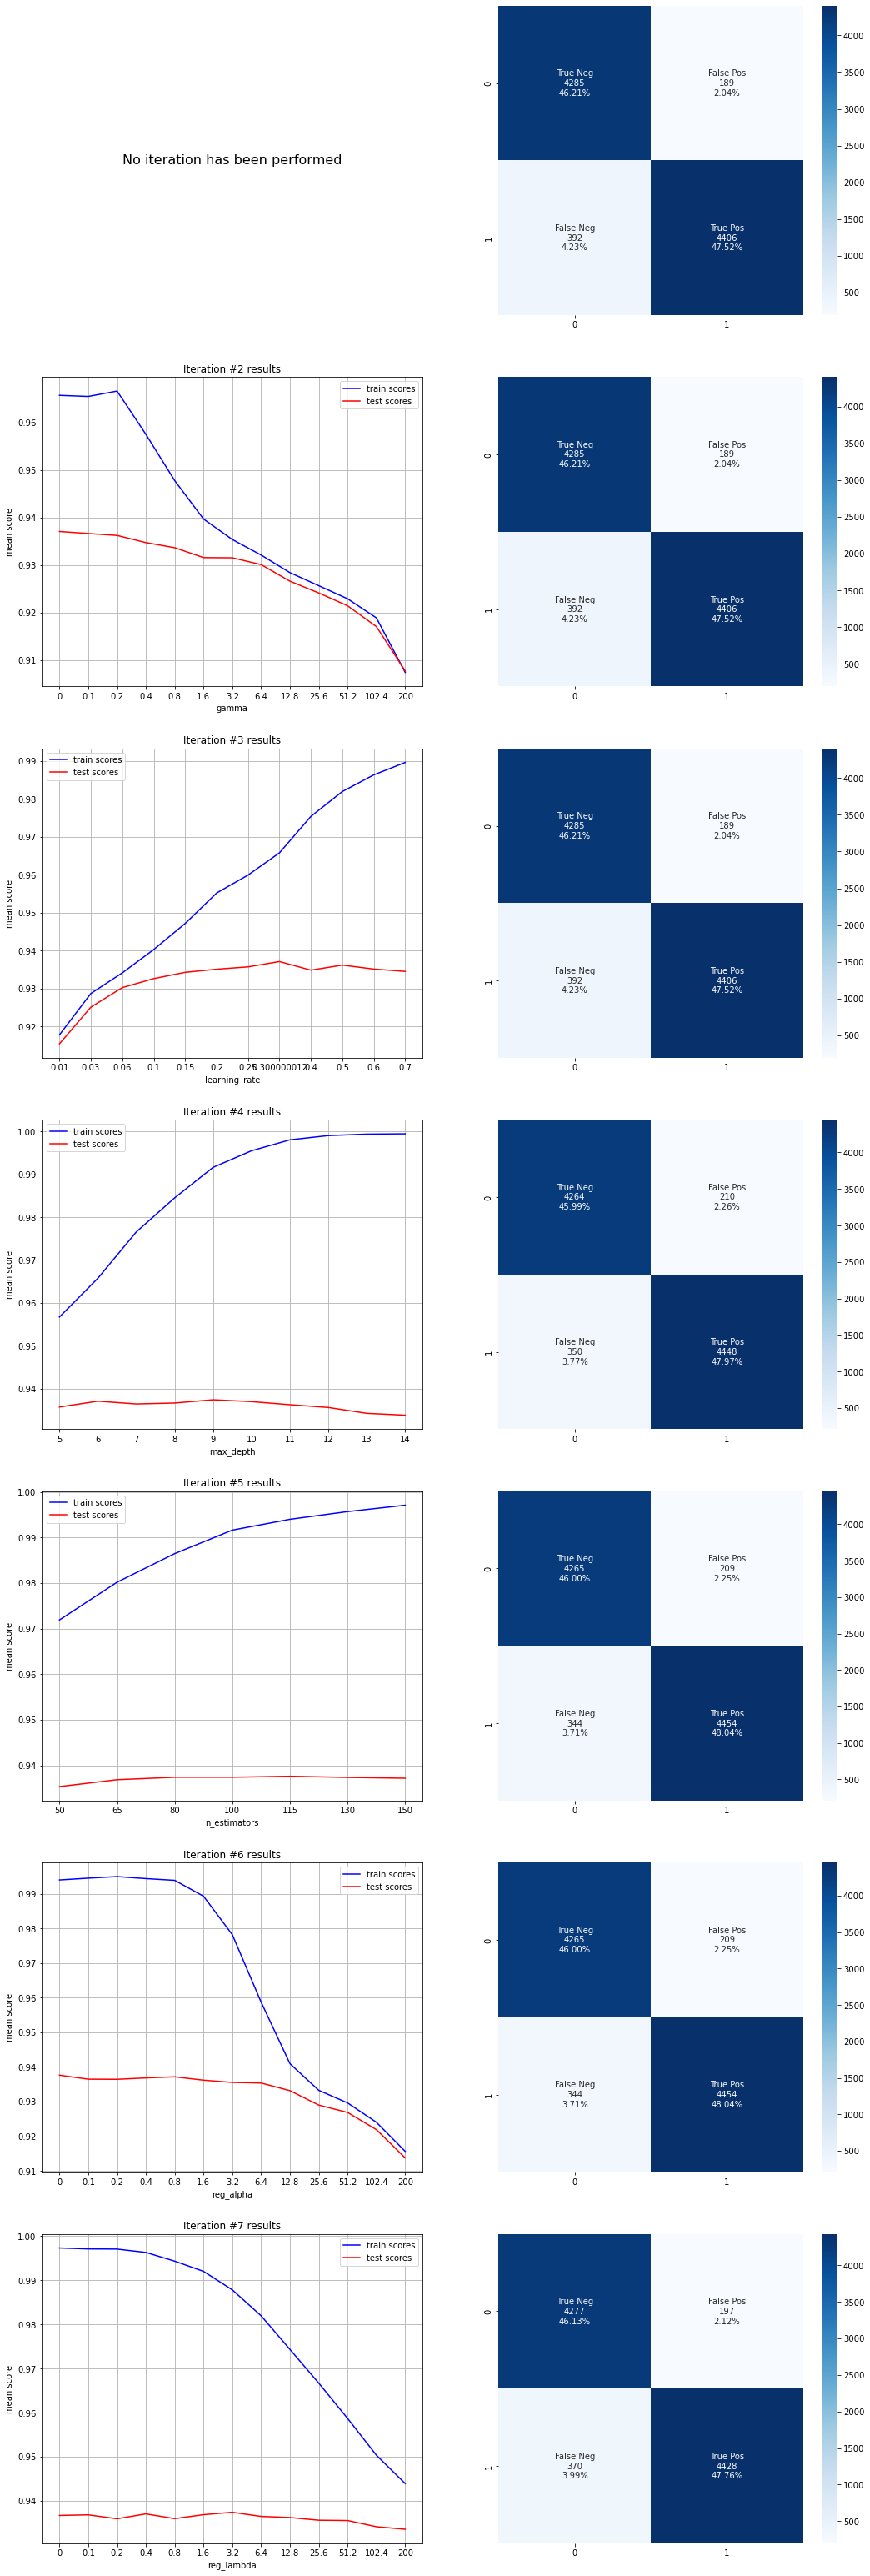

In [81]:
#number of rows depend on number of iterations
nrows = len(results_dict.keys())

#standard group names for confusion matrices
group_names = ['True Neg','False Pos','False Neg','True Pos']

#creating figure
f, axes = plt.subplots(nrows,2,figsize=(18,8*nrows));

#iteratively plotting train/test accuracy scores and test confusion matrix
for i,ax in enumerate(axes):
    
    #current key of results dictionary
    ckey = list(results_dict.keys())[i] 
    
    #plotting scores for models other than the benchark model
    if ckey != 'xgbc0':
        x1 = results_dict[ckey]['cv_results'].loc[:,'mean_train_score']
        x2 = results_dict[ckey]['cv_results'].loc[:,'mean_test_score']
        
        ax[0].plot(x1, label='train scores', color='blue');
        ax[0].plot(x2, label='test scores', color='red');
        ax[0].set_title(f'Iteration #{i+1} results');
               
        ax[0].set_xticks(list(range(0,len([x[results_dict[ckey]['iterable_parameter']] for x in results_dict[ckey]['cv_results']['params']]))));
        ax[0].set_xticklabels(sorted([x[results_dict[ckey]['iterable_parameter']] for x in results_dict[ckey]['cv_results']['params']]));
    
        ax[0].grid('major');
        ax[0].legend();
        ax[0].set_xlabel(results_dict[ckey]['iterable_parameter'])
        ax[0].set_ylabel('mean score');
    
    #leaving scores plot blank for benchmark model
    else:
        ax[0].axis('off')
        ax[0].text(x=0.5, y=0.5, s='No iteration has been performed', fontsize=16, va='center', ha='center')
    
    #computing variables for specific confusion matrix
    group_counts = ["{0:0.0f}".format(value) for value in results_dict[ckey]['cfm_test'].flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in results_dict[ckey]['cfm_test'].flatten()/np.sum(results_dict[ckey]['cfm_test'])]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    #plotting confusion matrix
    sns.heatmap(results_dict[ckey]['cfm_test'], annot=labels, fmt='', cmap='Blues', ax=ax[1])
    
plt.show();

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      4474
         1.0       0.96      0.92      0.94      4798

    accuracy                           0.94      9272
   macro avg       0.94      0.94      0.94      9272
weighted avg       0.94      0.94      0.94      9272



<AxesSubplot:>

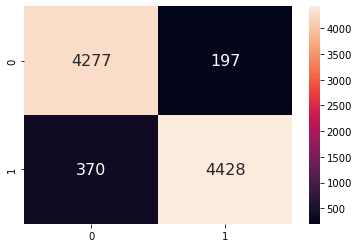

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
print(classification_report(y_test, test_predictions))
cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm, annot=True, annot_kws={"size": 16},fmt='g')

In [85]:
y_proba_XGB= clf.predict_proba(X_test)

In [86]:
y_proba_XGB[:, 1]

array([4.2346641e-02, 8.6665871e-03, 8.2591288e-03, ..., 7.2777469e-04,
       9.9064964e-01, 1.7313313e-01], dtype=float32)

model 1 AUC score: 0.9806238415537095


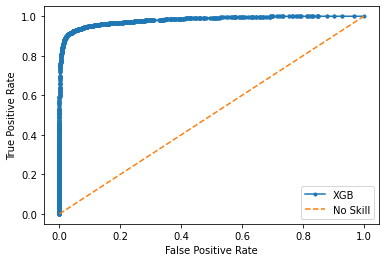

In [87]:
import matplotlib.pyplot as plt

def plot_roc_curve(y_test, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    ## generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    
    plt.plot(fpr, tpr,marker='.',label = 'XGB')
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.ylabel('True Positive Rate')
# keep probabilities for the positive outcome only
plot_roc_curve(y_test, y_proba_XGB[:,1])
print(f'model 1 AUC score: {roc_auc_score(y_test, y_proba_XGB[:,1])}')

In [207]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 12, max_leaf_nodes = 9, criterion='entropy')
dt.fit(X_train, y_train)
prediction_dt = dt.predict(X_test)
print(classification_report(y_test, prediction_dt))
y_proba_DT= dt.predict_proba(X_test)
y_proba_DT[:, 1]

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      4474
         1.0       0.94      0.87      0.91      4798

    accuracy                           0.91      9272
   macro avg       0.91      0.91      0.91      9272
weighted avg       0.91      0.91      0.91      9272



array([0.06538957, 0.11977077, 0.06538957, ..., 0.06538957, 0.89016305,
       0.11977077])

In [116]:
from sklearn.model_selection import RandomizedSearchCV
import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 20, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
pprint.pprint(random_grid)

{'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]}


In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = random_grid
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [118]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

# Instantiate a random forest classifier
rf = RandomForestClassifier()

# Set up a randomized search using the parameter grid and 10-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,
    cv=10,
    n_jobs=-1
)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Create a DataFrame of the results
results = pd.DataFrame(random_search.cv_results_)


In [123]:
random_search.best_params_

{'n_estimators': 180,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': None}

In [230]:
from sklearn.ensemble import RandomForestClassifier
random_forest_credit = RandomForestClassifier(n_estimators=100, max_depth = 25, max_leaf_nodes = 100, criterion='entropy', random_state = 0)
random_forest_credit.fit(X_train, y_train)
prediction_random = random_forest_credit.predict(X_test)
print(classification_report(y_test, prediction_random))
y_proba_RF= random_forest_credit.predict_proba(X_test)
y_proba_RF[:, 1]

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      4474
         1.0       0.95      0.90      0.93      4798

    accuracy                           0.93      9272
   macro avg       0.93      0.93      0.93      9272
weighted avg       0.93      0.93      0.93      9272



array([0.05977333, 0.09237432, 0.08301375, ..., 0.06402868, 0.67363724,
       0.27631359])

In [214]:
from sklearn.neighbors import KNeighborsClassifier
knn_credit = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 2)
knn_credit.fit(X_train, y_train)
prediction_knn = knn_credit.predict(X_test)
print(classification_report(y_test, prediction_knn))
y_proba_KNN= knn_credit.predict_proba(X_test)
y_proba_KNN[:, 1]

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      4474
         1.0       0.94      0.91      0.92      4798

    accuracy                           0.92      9272
   macro avg       0.92      0.92      0.92      9272
weighted avg       0.92      0.92      0.92      9272



array([0.        , 0.        , 0.        , ..., 0.        , 1.        ,
       0.28571429])

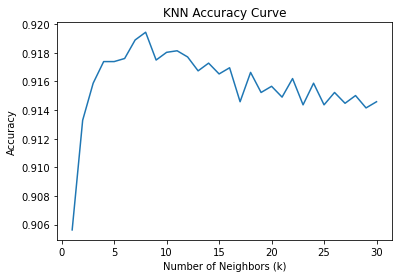

In [107]:
from sklearn.neighbors import KNeighborsClassifier
k_values = np.arange(1, 31)

# Initialize an empty list to store the accuracy scores for each k value
accuracy_scores = []

# Iterate over the range of k values and fit a KNN classifier for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski', p = 2)
    knn.fit(X_train, y_train)
    accuracy_scores.append(knn.score(X_test, y_test))

# Plot the accuracy scores for each k value
plt.plot(k_values, accuracy_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy Curve')
plt.show()

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=  18.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=  16.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.909 total time=  16.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.914 total time=  16.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=  17.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.911 total time=  11.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.914 total time=  11.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=  12.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.915 total time=  11.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.904 total time=  11.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.893 total time=  17.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [198]:
results.sort_values(by = 'rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
16      21.587755      1.552354         2.097836        0.242814     100   
21      90.788345      4.396956         1.900922        0.120148    1000   
11       9.878052      0.741099         2.359045        0.083480      10   
5       21.248320      1.006878         3.084482        0.097190       1   
22      23.407014      2.897147         1.980916        0.239882    1000   

   param_gamma param_kernel                                       params  \
16         0.1          rbf    {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}   
21         0.1          rbf   {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}   
11         0.1          rbf     {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}   
5            1          rbf        {'C': 1, 'gamma': 1, 'kernel': 'rbf'}   
22        0.01          rbf  {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}   

    split0_test_score  split1_test_score  split2_test_score  \
16           0.924515           0.924681           0.920906   
21           0.923616           0.922883           0.920187   
11           0.923077           0.924681           0.917850   
5            0.923796           0.923602           0.917850   
22           0.921100           0.923602           0.916232   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
16           0.926658           0.920007         0.923353        0.002499   
21           0.927377           0.920007         0.922814        0.002693   
11           0.924142           0.918030         0.921556        0.002998   
5            0.921086           0.919288         0.921124        0.002340   
22           0.921266           0.916951         0.919830        0.002798   

    rank_test_score  
16                1  
21                2  
11                3  
5                 4  
22                5

In [232]:
grid_svm = grid

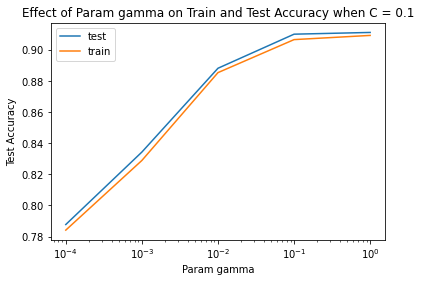

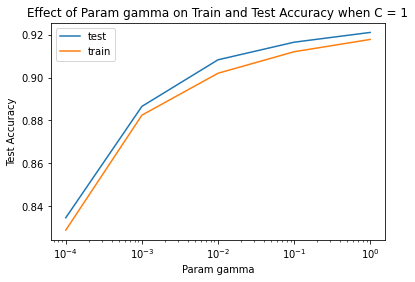

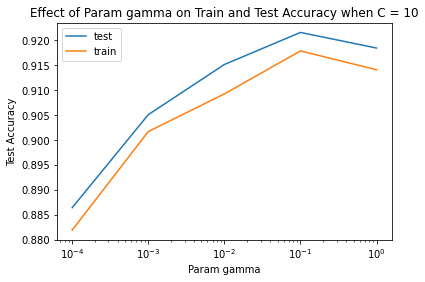

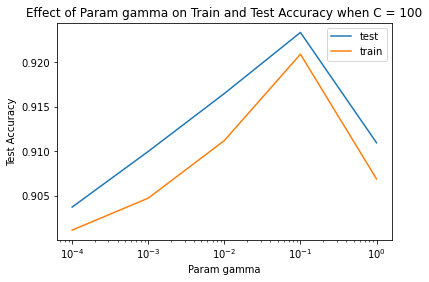

In [205]:
import matplotlib.pyplot as plt

for i in [0.1, 1, 10, 100]:
    c_values = results['param_gamma'][results['param_C'] == i]
    test_scores = results['mean_test_score'][results['param_C'] == i]

    plt.plot(c_values, test_scores,label = 'test')
    #print(results['split2_test_score'][results['param_C'] == i])
    plt.plot(c_values, results['split2_test_score'][results['param_C'] == i],label = 'train')
    plt.xscale('log')
    plt.xlabel('Param gamma')
    plt.ylabel('Test Accuracy')
    plt.title(f'Effect of Param gamma on Train and Test Accuracy when C = {i}')
    plt.legend()
    plt.show()


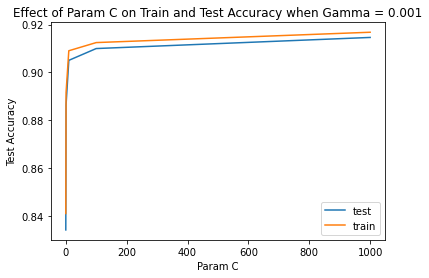

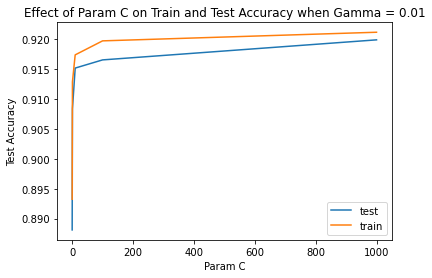

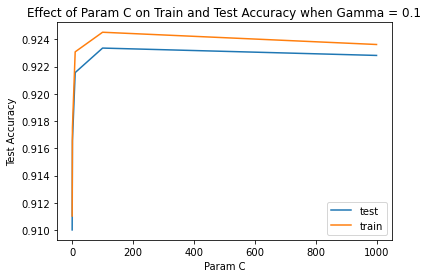

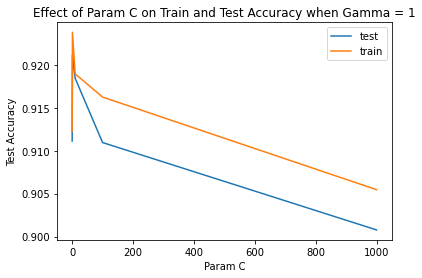

In [204]:
import matplotlib.pyplot as plt

for i in [0.001, 0.01, 0.1, 1]:
    c_values = results['param_C'][results['param_gamma'] == i]
    test_scores = results['mean_test_score'][results['param_gamma'] == i]

    plt.plot(c_values, test_scores,label = 'test')
    plt.plot(c_values, results['split0_test_score'][results['param_gamma'] == i],label = 'train')
    
    plt.xlabel('Param C')
    plt.ylabel('Test Accuracy')
    plt.title(f'Effect of Param C on Train and Test Accuracy when Gamma = {i}')
    plt.legend()
    plt.show()


In [203]:
from sklearn.svm import SVC
svm_credit = SVC(kernel='rbf', random_state=1, C = 200, gamma=0.1,probability=True) 
svm_credit.fit(X_train, y_train)
prediction_svm = svm_credit.predict(X_test)
print(classification_report(y_test, prediction_svm))
y_proba_SVM= svm_credit.predict_proba(X_test)
y_proba_SVM[:, 1]

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92      4474
         1.0       0.96      0.89      0.93      4798

    accuracy                           0.92      9272
   macro avg       0.93      0.93      0.92      9272
weighted avg       0.93      0.92      0.92      9272



array([1.31944028e-01, 1.30393075e-01, 8.50442842e-02, ...,
       5.54627361e-05, 9.68506971e-01, 1.71408463e-01])

In [ ]:
X_train.shape

(27603, 24)

In [233]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 
ann = Sequential()
ann.add(Dense(500, activation='relu', input_dim=24))
ann.add(Dense(100, activation='relu'))
ann.add(Dense(50, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

# Compile the ann
ann.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=100)
'''
prediction_ANN= ann.predict(X_test)
y_proba_ANN= ann.predict_proba(X_test)
y_proba_ANN[:, 1]
'''

Epoch 1/100
870/870 [==============================] - 2s 2ms/step - loss: 0.2499 - accuracy: 0.9046
Epoch 2/100
870/870 [==============================] - 1s 2ms/step - loss: 0.2171 - accuracy: 0.9181
Epoch 3/100
870/870 [==============================] - 1s 1ms/step - loss: 0.2119 - accuracy: 0.9193
Epoch 4/100
870/870 [==============================] - 1s 1ms/step - loss: 0.2087 - accuracy: 0.9209
Epoch 5/100
870/870 [==============================] - 1s 1ms/step - loss: 0.2054 - accuracy: 0.9211
Epoch 6/100
870/870 [==============================] - 1s 1ms/step - loss: 0.2026 - accuracy: 0.9243
Epoch 7/100
870/870 [==============================] - 1s 1ms/step - loss: 0.2000 - accuracy: 0.9247
Epoch 8/100
870/870 [==============================] - 1s 1ms/step - loss: 0.1992 - accuracy: 0.9254
Epoch 9/100
870/870 [==============================] - 1s 1ms/step - loss: 0.1988 - accuracy: 0.9253
Epoch 10/100
870/870 [==============================] - 1s 1ms/step - loss: 0.1961 - accura

AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [235]:
prediction_ANN= ann.predict(X_test)
prediction_ANN
#print(classification_report(y_test, prediction_ANN))
#y_proba_ANN= ann.predict_proba(X_test)
#y_proba_ANN[:, 1]
y_proba_ANN = prediction_ANN
y_pred_ANN = [1 if i > 0.72 else 0 for i in prediction_ANN ]
print(classification_report(y_test, y_pred_ANN))

290/290 [==============================] - 0s 996us/step
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      4474
         1.0       0.95      0.89      0.91      4798

    accuracy                           0.91      9272
   macro avg       0.92      0.92      0.91      9272
weighted avg       0.92      0.91      0.91      9272



XGB AUC score: 0.9812694288313785
 RF AUC score: 0.9735848772815838
ANN AUC score: 0.9571089539444347
SVM AUC score: 0.9568663152615287
KNN AUC score: 0.953116057723979
 DT AUC score: 0.9112850541949816
Base AUC score: 0.5


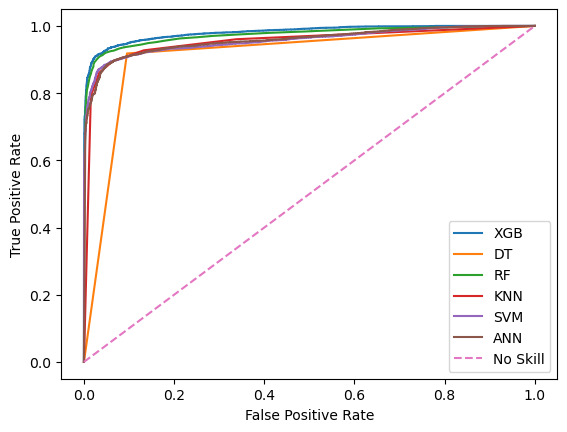

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
    
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_XGB[:,1])
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_proba_DT[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_RF[:,1])
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_proba_KNN[:,1])
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_proba_SVM[:,1])
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_proba_ANN)

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

plt.plot(fpr_xgb, tpr_xgb,label = 'XGB')
plt.plot(fpr_dt, tpr_dt,label = 'DT')
plt.plot(fpr_rf, tpr_rf,label = 'RF')
plt.plot(fpr_knn, tpr_knn,label = 'KNN')
plt.plot(fpr_svm, tpr_svm,label = 'SVM')
plt.plot(fpr_ann, tpr_ann,label = 'ANN')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')


plt.xlabel('False Positive Rate')
plt.legend()
plt.ylabel('True Positive Rate')
print(f'XGB AUC score: {roc_auc_score(y_test, y_proba_XGB[:,1])}')
print(f' RF AUC score: {roc_auc_score(y_test, y_proba_RF[:,1])}')
print(f'ANN AUC score: {roc_auc_score(y_test, y_proba_ANN)}')
print(f'SVM AUC score: {roc_auc_score(y_test, y_proba_SVM[:,1])}')
print(f'KNN AUC score: {roc_auc_score(y_test, y_proba_KNN[:,1])}')
print(f' DT AUC score: {roc_auc_score(y_test, y_proba_DT[:,1])}')

print(f'Base AUC score: {roc_auc_score(y_test, ns_probs)}')

In [240]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# create a voting classifier using weighted voting
ensemble_clf = VotingClassifier(estimators=[('XGB', clf), ('RF', random_forest_credit), ('SVM', svm_credit), ('KNN', knn), ('DT', dt)],
                                voting='soft',
                                weights=[0.4, 0.3, 0.1,0.1,0.1])

# specify the weight values to search over
weight_values = [
    [0.4, 0.3, 0.1, 0.1,0.1],
    [0.3, 0.4, 0.1, 0.1,0.1],
    [0.2, 0.2, 0.4, 0.1,0.1],
    [0.2, 0.2, 0.1, 0.4,0.1],
    [0.2, 0.2, 0.1, 0.1,0.4],
]

# specify the parameter grid for the grid search
param_grid = {'weights': weight_values}

# create the grid search object
voting_grid_search = GridSearchCV(ensemble_clf, param_grid, cv=5)

# fit the grid search object to the data
voting_grid_search.fit(X_train, y_train)

# print the best parameters and score
print("Best parameters: ", voting_grid_search.best_params_)
print("Best score: ", voting_grid_search.best_score_)

Fitting 3 folds for each of 13 candidates, totalling 39 fits
Fitting 3 folds for each of 13 candidates, totalling 39 fits
Fitting 3 folds for each of 13 candidates, totalling 39 fits
Fitting 3 folds for each of 13 candidates, totalling 39 fits
Fitting 3 folds for each of 13 candidates, totalling 39 fits
Fitting 3 folds for each of 13 candidates, totalling 39 fits
Fitting 3 folds for each of 13 candidates, totalling 39 fits
Fitting 3 folds for each of 13 candidates, totalling 39 fits
Fitting 3 folds for each of 13 candidates, totalling 39 fits
Fitting 3 folds for each of 13 candidates, totalling 39 fits
Fitting 3 folds for each of 13 candidates, totalling 39 fits
Fitting 3 folds for each of 13 candidates, totalling 39 fits
Fitting 3 folds for each of 13 candidates, totalling 39 fits
Fitting 3 folds for each of 13 candidates, totalling 39 fits
Fitting 3 folds for each of 13 candidates, totalling 39 fits
Fitting 3 folds for each of 13 candidates, totalling 39 fits
Fitting 3 folds for each

In [244]:
pd.DataFrame(voting_grid_search.cv_results_).sort_values(by = 'rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     113.097316      4.074589         4.531689        0.298076   
1     111.323871      5.173608         4.514807        0.291336   
3     116.969243      6.196699         4.539951        0.160377   
2     110.721225      3.222089         4.466560        0.172420   
4     111.713894      3.916797         4.509024        0.120213   

               param_weights                                  params  \
0  [0.4, 0.3, 0.1, 0.1, 0.1]  {'weights': [0.4, 0.3, 0.1, 0.1, 0.1]}   
1  [0.3, 0.4, 0.1, 0.1, 0.1]  {'weights': [0.3, 0.4, 0.1, 0.1, 0.1]}   
3  [0.2, 0.2, 0.1, 0.4, 0.1]  {'weights': [0.2, 0.2, 0.1, 0.4, 0.1]}   
2  [0.2, 0.2, 0.4, 0.1, 0.1]  {'weights': [0.2, 0.2, 0.4, 0.1, 0.1]}   
4  [0.2, 0.2, 0.1, 0.1, 0.4]  {'weights': [0.2, 0.2, 0.1, 0.1, 0.4]}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.935478           0.935826           0.928636           0.936186   
1           0.933142           0.933849           0.927737           0.934388   
3           0.929188           0.931332           0.925220           0.929894   
2           0.929008           0.929175           0.925400           0.930972   
4           0.927570           0.927737           0.918929           0.926838   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.934028         0.934031        0.002795                1  
1           0.932231         0.932269        0.002379                2  
3           0.927557         0.928638        0.002097                3  
2           0.928096         0.928530        0.001822                4  
4           0.922704         0.924755        0.003444                5